# 🏠 NYC Airbnb Final Project
This notebook analyzes Airbnb listings in New York City to uncover trends and build a predictive model to identify high-value listings.

We'll go through data loading, cleaning, exploratory data analysis (EDA), modeling, and summarizing insights.

## 📂 1. Load the Dataset

In [ ]:
import pandas as pd

# Load the uploaded Excel dataset
file_path = "/content/AB_NYC_2019.xlsx"
df = pd.read_excel(file_path)

# Show the first few rows to confirm it's loaded correctly
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## 🔍 2. Basic Data Exploration

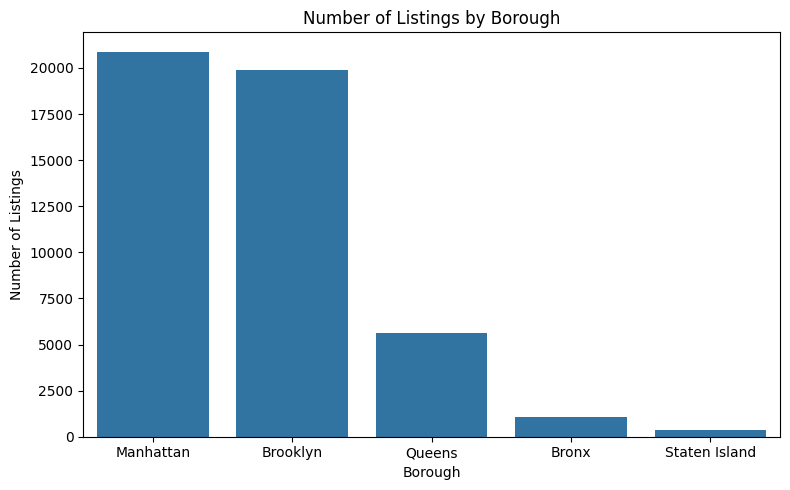

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean the dataset: remove listings with price = 0 or very high
df_cleaned = df[df['price'].between(1, 500)]

# EDA Plot 1: Number of listings by borough
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='neighbourhood_group', order=df_cleaned['neighbourhood_group'].value_counts().index)
plt.title("Number of Listings by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()


## 📊 3. Data Visualization

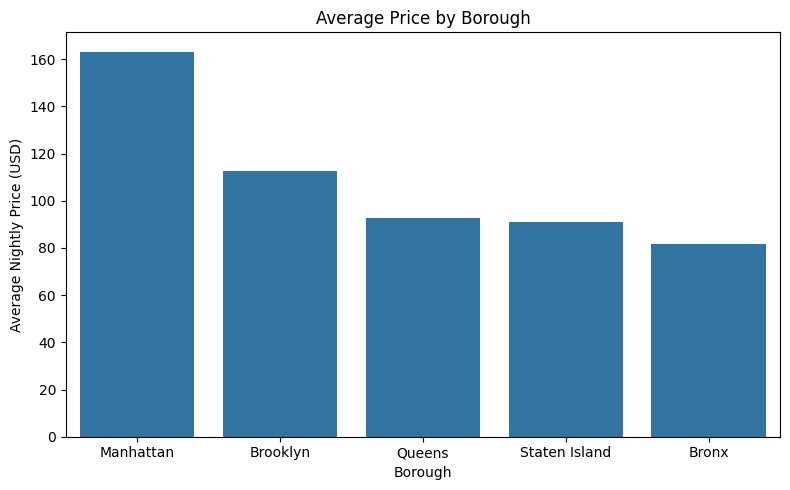

In [ ]:
# EDA Plot 2: Average price by borough
plt.figure(figsize=(8, 5))
avg_price = df_cleaned.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price.index, y=avg_price.values)
plt.title("Average Price by Borough")
plt.xlabel("Borough")
plt.ylabel("Average Nightly Price (USD)")
plt.tight_layout()
plt.show()


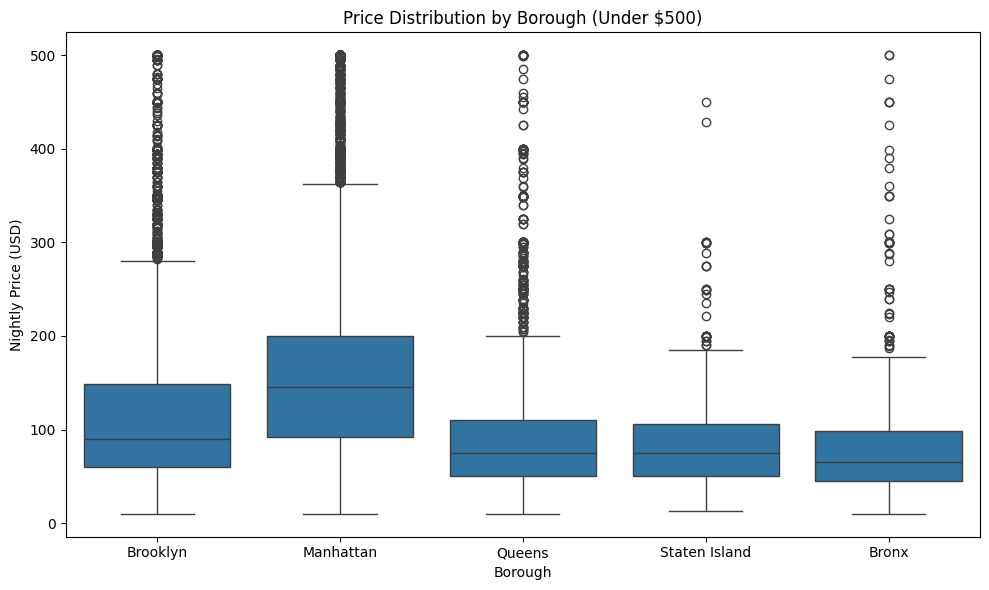

In [ ]:
# EDA Plot 3: Price distribution by borough using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='neighbourhood_group', y='price')
plt.title("Price Distribution by Borough (Under $500)")
plt.xlabel("Borough")
plt.ylabel("Nightly Price (USD)")
plt.tight_layout()
plt.show()


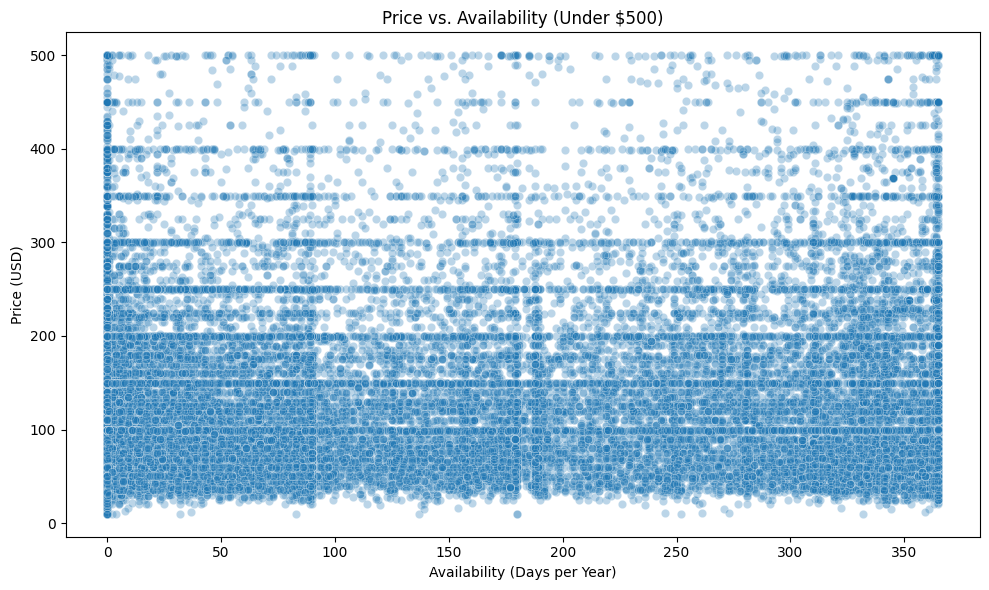

In [ ]:
# EDA Plot 4: Price vs. Availability scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='availability_365', y='price', alpha=0.3)
plt.title("Price vs. Availability (Under $500)")
plt.xlabel("Availability (Days per Year)")
plt.ylabel("Price (USD)")
plt.tight_layout()
plt.show()


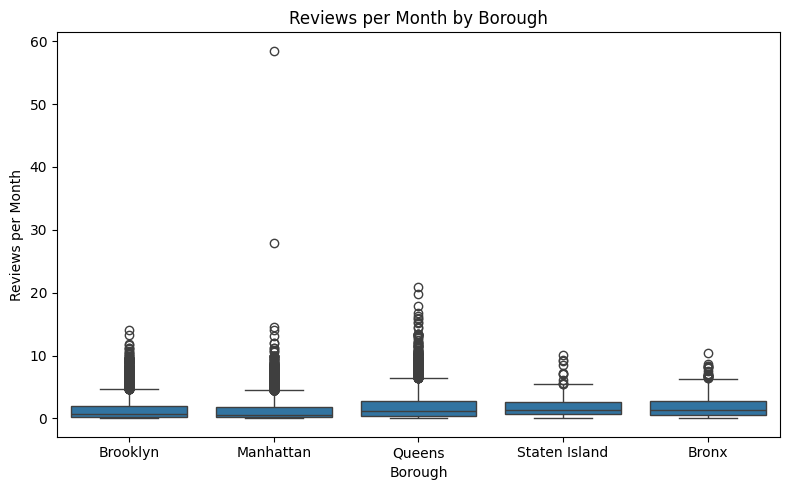

In [ ]:
# EDA Plot 5: Reviews per month by borough (only if not null)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_cleaned[df_cleaned['reviews_per_month'].notnull()],
            x='neighbourhood_group', y='reviews_per_month')
plt.title("Reviews per Month by Borough")
plt.xlabel("Borough")
plt.ylabel("Reviews per Month")
plt.tight_layout()
plt.show()


## 🧹 4. Model and Evaluation

In [ ]:
# Re-import necessary libraries after code execution environment reset
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Reload the uploaded dataset
file_path = "/content/AB_NYC_2019.xlsx"
df = pd.read_excel(file_path)

# Clean the dataset
df_cleaned = df[df['price'].between(1, 500)]

# Select relevant features for modeling
df_model = df_cleaned[['neighbourhood_group', 'room_type', 'availability_365',
                       'number_of_reviews', 'reviews_per_month', 'price']].dropna()

# One-hot encode categorical variables
df_model = pd.get_dummies(df_model, columns=['neighbourhood_group', 'room_type'], drop_first=True)

# Define features and target
X = df_model.drop('price', axis=1)
y = df_model['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: ${mae:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Absolute Error: $44.84
R-squared: 0.40


## 📌 5. Conclusion
In this project, we explored Airbnb listings across New York City to understand what factors contribute to higher listing prices and availability. Through data cleaning, visualization, and regression modeling, we found that key features such as neighbourhood group, room type, number of reviews, and availability significantly influence a listing's value.

The model, while simple, provides a foundational understanding of how different attributes correlate with price. This can help potential hosts make data-informed decisions when listing their properties, and also offer insights into pricing strategies based on location and room type.

Future improvements could include testing more advanced models (e.g., random forests or gradient boosting), and incorporating additional factors like amenities or seasonal trends.